In [1]:
import os, sys
from os.path import dirname
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from unittest.mock import MagicMock, patch
from performance_data.data_table import PhaseData, DataTable
from performance_data.data_model import PhaseGenerator, AbstractModel
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import loguru
loguru.logger.remove()
loguru.logger.add(sys.stderr, level="INFO")

1

In [2]:
models = [MLPRegressor, LinearRegression, Ridge, Lasso, ElasticNet, 
          DecisionTreeRegressor, RandomForestRegressor, GradientBoostingRegressor, SVR]

for model_type in models:
    class RegModel(AbstractModel):
        def _create_model(self):
            return model_type()
    
    model = RegModel()
    model.train_model()

# print(model.model)
# for tier in model.target_tiers:
#     score = model.model[tier].evaluate_model()
#     print(f"Model {model.model[tier].__name__} score: {score}")

2023-03-09 16:28:56.872 | INFO     | performance_data.data_model:_prepare_data:194 - Preparing data...
2023-03-09 16:28:56.874 | INFO     | performance_data.data_model:_prepare_input_data:148 - Preparing input data...
2023-03-09 16:28:56.905 | INFO     | performance_data.data_model:__init__:132 - Loading model from /home_nfs/mimounis/iosea-wp3-recommandation-system/performance_data/defaults/models/reg_model_lfs_bw.joblib
2023-03-09 16:28:56.908 | INFO     | performance_data.data_model:_prepare_data:194 - Preparing data...
2023-03-09 16:28:56.909 | INFO     | performance_data.data_model:_prepare_input_data:148 - Preparing input data...
2023-03-09 16:28:56.932 | INFO     | performance_data.data_model:__init__:135 - Creating a new model: reg_model_fs1_bw.joblib
2023-03-09 16:28:56.933 | INFO     | performance_data.data_model:train_model:217 - Training model...
2023-03-09 16:28:56.942 | INFO     | performance_data.data_model:train_model:220 - Model score for tier lfs_bw: 0.4387300910190121

In [12]:
def plot_fit(model):
    """
    Plots the fit of the model on the training data.
    """
    # Make predictions on the training data
    y_test_pred = model.predict(model.X_test)

    # Plot the fit of the model on the training data
    plt.scatter(model.y_test, y_test_pred, color='blue')
    plt.ylabel("Predictions")
    plt.xlabel("True Values")
    plt.title("Fit of the Model on the Training Data")
    plt.show()
    
for Model in [MLPRegressor, LinearRegression, Ridge, Lasso, ElasticNet, 
              DecisionTreeRegressor, RandomForestRegressor, GradientBoostingRegressor, SVR]:
    
    class RegModel(AbstractModel):
        def _create_model(self):
            return Model()
    print(f"=======Training and evaluating : {Model.__name__}========")
    model = RegModel()
    model.train_model()
    model.evaluate_model()
    print(model.model)
    for tier in model.target_tiers:
        print(f"Model: {model.model[tier]['model_name']} | score: {model.model[tier]['score']}")
    #plot_fit(model)



2023-03-09 11:14:41.935 | INFO     | performance_data.data_model:_prepare_data:194 - Preparing data...
2023-03-09 11:14:41.936 | INFO     | performance_data.data_model:_prepare_input_data:148 - Preparing input data...
2023-03-09 11:14:41.958 | INFO     | performance_data.data_model:__init__:132 - Loading model from /home_nfs/mimounis/iosea-wp3-recommandation-system/performance_data/defaults/models/reg_model_lfs_bw.joblib
2023-03-09 11:14:41.961 | INFO     | performance_data.data_model:_prepare_data:194 - Preparing data...
2023-03-09 11:14:41.962 | INFO     | performance_data.data_model:_prepare_input_data:148 - Preparing input data...
2023-03-09 11:14:41.983 | INFO     | performance_data.data_model:__init__:135 - Creating a new model: reg_model_nfs_bw.joblib
2023-03-09 11:14:41.984 | INFO     | performance_data.data_model:train_model:217 - Training model...
2023-03-09 11:14:41.989 | INFO     | performance_data.data_model:train_model:220 - Model score for tier lfs_bw: 0.8808413231483786

=======Training and evaluating : MLPRegressor========


/home_nfs/mimounis/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
2023-03-09 11:14:42.318 | INFO     | performance_data.data_model:train_model:220 - Model score for tier nfs_bw: -0.17494463635671953
2023-03-09 11:14:42.323 | INFO     | performance_data.data_model:evaluate_model:237 - Model: reg_model_lfs_bw.joblib | Score on test data: 0.8808413231483786
2023-03-09 11:14:42.328 | INFO     | performance_data.data_model:evaluate_model:237 - Model: reg_model_nfs_bw.joblib | Score on test data: -0.17494463635671953
2023-03-09 11:14:42.337 | INFO     | performance_data.data_model:_prepare_data:194 - Preparing data...
2023-03-09 11:14:42.338 | INFO     | performance_data.data_model:_prepare_input_data:148 - Preparing input data...
2023-03-09 11:14:42.377 | INFO     | performance_data.data_model:__init__:1

{'lfs_bw': {'model_name': 'reg_model_lfs_bw.joblib', 'model_path': '/home_nfs/mimounis/iosea-wp3-recommandation-system/performance_data/defaults/models/reg_model_lfs_bw.joblib', 'model': DecisionTreeRegressor(), 'score': 0.8808413231483786}, 'nfs_bw': {'model_name': 'reg_model_nfs_bw.joblib', 'model_path': '/home_nfs/mimounis/iosea-wp3-recommandation-system/performance_data/defaults/models/reg_model_nfs_bw.joblib', 'model': MLPRegressor(), 'score': -0.17494463635671953}}
Model: reg_model_lfs_bw.joblib | score: 0.8808413231483786
Model: reg_model_nfs_bw.joblib | score: -0.17494463635671953
=======Training and evaluating : LinearRegression========
{'lfs_bw': {'model_name': 'reg_model_lfs_bw.joblib', 'model_path': '/home_nfs/mimounis/iosea-wp3-recommandation-system/performance_data/defaults/models/reg_model_lfs_bw.joblib', 'model': DecisionTreeRegressor(), 'score': 0.869317539834756}, 'nfs_bw': {'model_name': 'reg_model_nfs_bw.joblib', 'model_path': '/home_nfs/mimounis/iosea-wp3-recommand

2023-03-09 11:14:42.543 | INFO     | performance_data.data_model:__init__:132 - Loading model from /home_nfs/mimounis/iosea-wp3-recommandation-system/performance_data/defaults/models/reg_model_lfs_bw.joblib
2023-03-09 11:14:42.547 | INFO     | performance_data.data_model:_prepare_data:194 - Preparing data...
2023-03-09 11:14:42.548 | INFO     | performance_data.data_model:_prepare_input_data:148 - Preparing input data...
2023-03-09 11:14:42.568 | INFO     | performance_data.data_model:__init__:135 - Creating a new model: reg_model_nfs_bw.joblib
2023-03-09 11:14:42.569 | INFO     | performance_data.data_model:train_model:217 - Training model...
2023-03-09 11:14:42.575 | INFO     | performance_data.data_model:train_model:220 - Model score for tier lfs_bw: 0.9754050314529593
2023-03-09 11:14:42.580 | INFO     | performance_data.data_model:train_model:226 - Saving Model for lfs_bw: /home_nfs/mimounis/iosea-wp3-recommandation-system/performance_data/defaults/models/reg_model_lfs_bw.joblib |

{'lfs_bw': {'model_name': 'reg_model_lfs_bw.joblib', 'model_path': '/home_nfs/mimounis/iosea-wp3-recommandation-system/performance_data/defaults/models/reg_model_lfs_bw.joblib', 'model': DecisionTreeRegressor(), 'score': 0.9754050314529593}, 'nfs_bw': {'model_name': 'reg_model_nfs_bw.joblib', 'model_path': '/home_nfs/mimounis/iosea-wp3-recommandation-system/performance_data/defaults/models/reg_model_nfs_bw.joblib', 'model': Lasso(), 'score': -0.7069117786638976}}
Model: reg_model_lfs_bw.joblib | score: 0.9754050314529593
Model: reg_model_nfs_bw.joblib | score: -0.7069117786638976
=======Training and evaluating : ElasticNet========
{'lfs_bw': {'model_name': 'reg_model_lfs_bw.joblib', 'model_path': '/home_nfs/mimounis/iosea-wp3-recommandation-system/performance_data/defaults/models/reg_model_lfs_bw.joblib', 'model': DecisionTreeRegressor(), 'score': 0.9526931990310227}, 'nfs_bw': {'model_name': 'reg_model_nfs_bw.joblib', 'model_path': '/home_nfs/mimounis/iosea-wp3-recommandation-system/p

2023-03-09 11:14:42.797 | INFO     | performance_data.data_model:train_model:226 - Saving Model for lfs_bw: /home_nfs/mimounis/iosea-wp3-recommandation-system/performance_data/defaults/models/reg_model_lfs_bw.joblib | saved with score: 0.9638928550195496
2023-03-09 11:14:42.798 | INFO     | performance_data.data_model:train_model:217 - Training model...
2023-03-09 11:14:42.984 | INFO     | performance_data.data_model:train_model:220 - Model score for tier nfs_bw: 0.1252101461474382
2023-03-09 11:14:42.987 | INFO     | performance_data.data_model:evaluate_model:237 - Model: reg_model_lfs_bw.joblib | Score on test data: 0.9638928550195496
2023-03-09 11:14:43.003 | INFO     | performance_data.data_model:evaluate_model:237 - Model: reg_model_nfs_bw.joblib | Score on test data: 0.1252101461474382
2023-03-09 11:14:43.009 | INFO     | performance_data.data_model:_prepare_data:194 - Preparing data...
2023-03-09 11:14:43.010 | INFO     | performance_data.data_model:_prepare_input_data:148 - Pre

{'lfs_bw': {'model_name': 'reg_model_lfs_bw.joblib', 'model_path': '/home_nfs/mimounis/iosea-wp3-recommandation-system/performance_data/defaults/models/reg_model_lfs_bw.joblib', 'model': DecisionTreeRegressor(), 'score': 0.9638928550195496}, 'nfs_bw': {'model_name': 'reg_model_nfs_bw.joblib', 'model_path': '/home_nfs/mimounis/iosea-wp3-recommandation-system/performance_data/defaults/models/reg_model_nfs_bw.joblib', 'model': RandomForestRegressor(), 'score': 0.1252101461474382}}
Model: reg_model_lfs_bw.joblib | score: 0.9638928550195496
Model: reg_model_nfs_bw.joblib | score: 0.1252101461474382
=======Training and evaluating : GradientBoostingRegressor========
{'lfs_bw': {'model_name': 'reg_model_lfs_bw.joblib', 'model_path': '/home_nfs/mimounis/iosea-wp3-recommandation-system/performance_data/defaults/models/reg_model_lfs_bw.joblib', 'model': DecisionTreeRegressor(), 'score': 0.9526734236342459}, 'nfs_bw': {'model_name': 'reg_model_nfs_bw.joblib', 'model_path': '/home_nfs/mimounis/iose

2023-03-09 16:31:59.843 | INFO     | performance_data.data_model:_prepare_data:194 - Preparing data...
2023-03-09 16:31:59.844 | INFO     | performance_data.data_model:_prepare_input_data:148 - Preparing input data...
2023-03-09 16:31:59.866 | INFO     | performance_data.data_model:__init__:132 - Loading model from /home_nfs/mimounis/iosea-wp3-recommandation-system/performance_data/defaults/models/r_f_r_model_lfs_bw.joblib
2023-03-09 16:31:59.915 | INFO     | performance_data.data_model:_prepare_data:194 - Preparing data...
2023-03-09 16:31:59.916 | INFO     | performance_data.data_model:_prepare_input_data:148 - Preparing input data...
2023-03-09 16:31:59.939 | INFO     | performance_data.data_model:__init__:135 - Creating a new model: r_f_r_model_fs1_bw.joblib
2023-03-09 16:31:59.940 | INFO     | performance_data.data_model:train_model:217 - Training model...
2023-03-09 16:32:00.212 | INFO     | performance_data.data_model:train_model:220 - Model score for tier lfs_bw: 0.727612488565

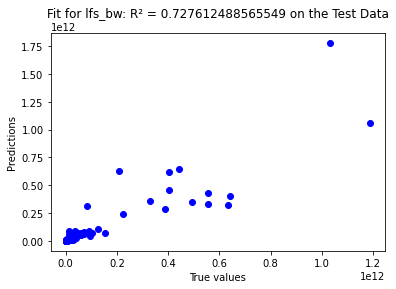

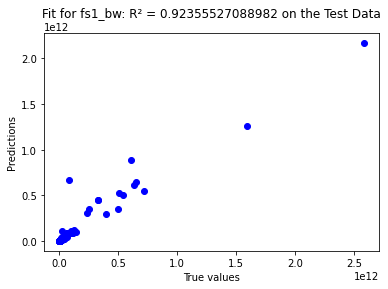

In [3]:
# evaluate the model
def plot_fit(model):
        """
        Plots the fit of the model on the training data.
        """
        # Make predictions on the training data
        

        # Plot the fit of the model on the training data
        for tier in model.target_tiers:           
            y_test_pred = model.predict(model.data["X_test"], process_input=False)     
            plt.scatter(model.data[tier]["y_test"], y_test_pred[tier], color='blue')
            plt.xlabel("True values")
            plt.ylabel("Predictions")
            plt.title(f"Fit for {tier}: R² = {model.model[tier]['score']} on the Test Data")
            plt.show()

class RFRModel(AbstractModel):
        def _create_model(self):
            return RandomForestRegressor()
model = RFRModel()
model.train_model()
# print(model.evaluate_model())

# print(model.data["X_train"])   
# print(model.data["lfs_bw"]["y_test"])     
plot_fit(model)
